In [485]:
# Data Manupulation
import numpy as np
import pandas as pd

# Techinical Indicators
import talib as ta

# Plotting graphs
import matplotlib.pyplot as plt

# Machine learning
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score

# Data fetching
from pandas_datareader import data as pdr
import yahoo_finance as yf

In [486]:
df = pdr.get_data_yahoo('SPY', '01-30-1993', '01-30-2019')
df = df.dropna()
df = df.iloc[:,:4]
df.head()

,High,Low,Open,Close
Date,,,,
1993-02-01,44.25000,43.96875,43.96875,44.25000
1993-02-02,44.37500,44.12500,44.21875,44.34375
1993-02-03,44.84375,44.37500,44.40625,44.81250
1993-02-04,45.09375,44.46875,44.96875,45.00000
1993-02-05,45.06250,44.71875,44.96875,44.96875


In [487]:
df['S_10'] = df['Close'].rolling(window=10).mean()
df['Corr'] = df['Close'].rolling(window=10).corr(df['S_10'])
df['RSI'] = ta.RSI(np.array(df['Close']), timeperiod =10)
df['Open-Close'] = df['Open'] - df['Close'].shift(1)
df['Open-Open'] = df['Open'] - df['Open'].shift(1)
df = df.dropna()
X = df.iloc[:,:9]

In [488]:
y = np.where (df['Close'].shift(-1) > df['Close'],1,-1)

In [489]:
split = int(0.80*len(df))

X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

In [490]:
model = LogisticRegression()

model = model.fit (X_train,y_train)

C:\Users\Karim Elbahloul\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [491]:
pd.DataFrame(zip(X.columns, np.transpose(model.coef_)))

,0,1
0,High,[0.16702076781462807]
1,Low,[0.23161560577400633]
2,Open,[-0.1772747869130721]
3,Close,[-0.2431548642011617]
4,S_10,[0.02249801459065234]
5,Corr,[-0.007798489499896043]
6,RSI,[-0.004151759680023701]
7,Open-Close,[0.08631291429762937]
8,Open-Open,[-0.031824008336422294]


In [492]:
probability = model.predict_proba(X_test)

print(probability)

[[0.46096997 0.53903003]
 [0.49743606 0.50256394]
 [0.4808132  0.5191868 ]
 ...
 [0.461059   0.538941  ]
 [0.4747136  0.5252864 ]
 [0.5145189  0.4854811 ]]


In [493]:
predicted = model.predict(X_test)

In [494]:
print (metrics.confusion_matrix(y_test, predicted))

[[ 97 504]
 [122 583]]


In [495]:
print (metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

          -1       0.44      0.16      0.24       601
           1       0.54      0.83      0.65       705

   micro avg       0.52      0.52      0.52      1306
   macro avg       0.49      0.49      0.44      1306
weighted avg       0.49      0.52      0.46      1306



In [496]:
print (model.score(X_test,y_test))

0.5206738131699847


In [497]:
cross_val = cross_val_score(LogisticRegression(), X, y, scoring='accuracy', cv=10)

print (cross_val)

print (cross_val.mean())

C:\Users\Karim Elbahloul\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Karim Elbahloul\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Karim Elbahloul\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Karim Elbahloul\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Karim Elbahloul\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed

[0.52446483 0.5412844  0.53905054 0.51914242 0.54211332 0.48238897
 0.52526799 0.54058193 0.51226994 0.53067485]
0.525723919686034


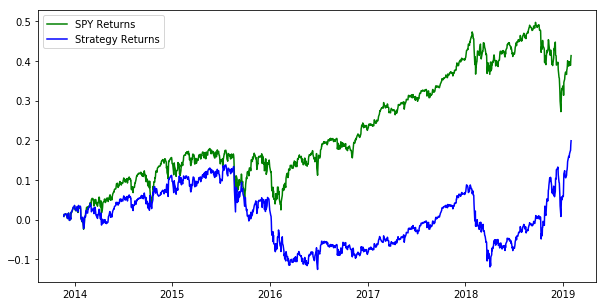

In [498]:
df['Predicted_Signal'] = model.predict(X)
df['SPY_returns'] = np.log(df['Close']/df['Close'].shift(1))
Cumulative_Nifty_returns = np.cumsum(df[split:]['SPY_returns'])
df['Startegy_returns'] = df['SPY_returns']* df['Predicted_Signal'].shift(1)
Cumulative_Strategy_returns = np.cumsum(df[split:]['Startegy_returns'])
plt.figure(figsize=(10,5))
plt.plot(Cumulative_Nifty_returns, color='g',label = 'SPY Returns')
plt.plot(Cumulative_Strategy_returns, color='b', label = 'Strategy Returns')
plt.legend()
plt.show()